# Unity Banana Navigation 

## Project overview 
For this project, you will train an agent to navigate (and collect bananas!) in a large, square world. A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana. Thus, the goal of your agent is to collect as many yellow bananas as possible while avoiding blue bananas.
<img src="./images/banana-intro.gif">
The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around the agent's forward direction. Given this information, the agent has to learn how to best select actions. Four discrete actions are available, corresponding to:
###   reward:
* +1 if collect yellow banana; 
* -1 otherwise. 

Also,
###   set of actions: 
* 0 - move forward.
* 1 - move backward.
* 2 - turn left.
* 3 - turn right.


##  packages


In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random 
import torch 

from unityagents import UnityEnvironment 
from collections import deque
from dqn_agent import Agent

## Create Unity environment

The Unity will be opened in a new window and we can see our agent running there.

In [10]:
env = UnityEnvironment(file_name = "Banana")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [11]:

env_info = env.reset(train_mode = True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)


In [12]:
# env = UnityEnvironment(file_name="Banana")
# brain_name = env.brain_names[0]
# brain = env.brains[brain_name]

# env_info = env.reset(train_mode=True)[brain_name]
# action_size = brain.vector_action_space_size
# state = env_info.vector_observations[0]
# state_size = len(state)

## Deep Q-Network (DQN)
The agnet needs to be trained. The termination condition happens as the average score exceeds 13.0 over 100 consecutive episodes. The weights of network are saved in a file named as `checkpoint_dqn.pth`, we can read this weights while initializing new agent to run trained agent. See this set of [Slides](https://drive.google.com/file/d/0BxZSPcA0DrkfNG9aSjYxM1RMVzQ/view) for more info. 

In [17]:
def dqn(agent, numEpisods= 4000, max_tStep = 1000, epsStart = 0.10, epsEnd =0.01, decayFactor = 0.999, flagT = True):
    '''
    Agent trained with deep Q-learning
        Input: 
        numEpisods (int): maximum number of training episodes
        max_tStep (int): maximum number of timesteps per episode
        epsStart (float): starting value of epsilon, for epsilon-greedy action selection
        epsEnd (float): minimum value of epsilon
        decayFactor (float): multiplicative factor (per episode) for decreasing epsilon
        flagT (bool): flag deciding if the agent will train or just play through the episode
    
    
    The implemention is adapted from the deep mind paper.
    Ref: https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf
    '''
    scores = []   
    scores_window = deque(maxlen=200)
    eps = epsStart 
    
    for iterEpisode in range(numEpisods):
        env_info = env.reset(train_mode=flagT)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        for dt in range(max_tStep):
            action = agent.act(state, eps if flagT else False)
            env_info  = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            if flagT:
                agent.step(state, action, reward, next_state, done)
            score += reward 
            state = next_state
            
            if done:
                break 
        scores_window.append(score)
        scores.append(score)
        eps = max(epsEnd, decayFactor*eps)
        
        print('===========================')
        
                
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(iterEpisode+1, np.mean(scores_window)), end="")
        if iterEpisode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(iterEpisode+1, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0 and flagT:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(iterEpisode+1-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dqn.pth')
            break
    return scores       
        

In [18]:
# iterEpisode = 2
# scores_window
# print('\rEpisode {}\tAverage Score: {:.2f}'.format(iterEpisode+1, np.mean(scores_window)), end="")

In [19]:
# def dqn(agent, n_episodes=4000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.999, train=True):
#     """Deep Q-Learning.
    
#     Args
#         n_episodes (int): maximum number of training episodes
#         max_t (int): maximum number of timesteps per episode
#         eps_start (float): starting value of epsilon, for epsilon-greedy action selection
#         eps_end (float): minimum value of epsilon
#         eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
#         train (bool): flag deciding if the agent will train or just play through the episode
#     """
#     scores = []                        # list containing scores from each episode
#     scores_window = deque(maxlen=100)  # last 100 scores
#     eps = eps_start                    # initialize epsilon
#     for i_episode in range(1, n_episodes+1):
#         env_info = env.reset(train_mode=train)[brain_name]
#         state = env_info.vector_observations[0]
#         score = 0
#         for t in range(max_t):
#             action = agent.act(state, eps if train else 0.0)
#             env_info = env.step(action)[brain_name]
#             next_state = env_info.vector_observations[0]   # get the next state
#             reward = env_info.rewards[0]                   # get the reward
#             done = env_info.local_done[0]                  # see if episode has finished
#             if train:
#                 agent.step(state, action, reward, next_state, done)
#             score += reward                                # update the score
#             state = next_state                             # roll over the state to next time step
#             if done:                                       # exit loop if episode finished
#                 break
#         scores_window.append(score)       # save most recent score
#         scores.append(score)              # save most recent score
#         eps = max(eps_end, eps_decay*eps) # decrease epsilon
#         print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
#         if i_episode % 100 == 0:
#             print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
#         if np.mean(scores_window)>=13.0 and train:
#             print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
#             torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dqn.pth')
#             break
#     return scores

## Train the agent

Episode 1	Average Score: -3.00
Episode 2	Average Score: -3.00===========================
Episode 3	Average Score: -2.00===========================
Episode 4	Average Score: -2.25===========================
Episode 5	Average Score: -2.00===========================
Episode 6	Average Score: -1.83===========================
Episode 7	Average Score: -1.29===========================
Episode 8	Average Score: -1.00===========================
Episode 9	Average Score: -0.89===========================
Episode 10	Average Score: -0.70===========================
Episode 11	Average Score: -0.45===========================
Episode 12	Average Score: -0.42===========================
Episode 13	Average Score: -0.46===========================
Episode 14	Average Score: -0.43===========================
Episode 15	Average Score: -0.53===========================
Episode 16	Average Score: -0.50===========================
Episode 17	Average Score: -0.53===========================
Episode 18	Average Score: -0.56==

Episode 141	Average Score: 2.86===========================
Episode 142	Average Score: 2.91===========================
Episode 143	Average Score: 2.92===========================
Episode 144	Average Score: 2.94===========================
Episode 145	Average Score: 2.95===========================
Episode 146	Average Score: 2.99===========================
Episode 147	Average Score: 3.01===========================
Episode 148	Average Score: 3.03===========================
Episode 149	Average Score: 3.04===========================
Episode 150	Average Score: 3.07===========================
Episode 151	Average Score: 3.04===========================
Episode 152	Average Score: 3.07===========================
Episode 153	Average Score: 3.08===========================
Episode 154	Average Score: 3.08===========================
Episode 155	Average Score: 3.08===========================
Episode 156	Average Score: 3.06===========================
Episode 157	Average Score: 3.06=========================

Episode 280	Average Score: 7.58===========================
Episode 281	Average Score: 7.62===========================
Episode 282	Average Score: 7.67===========================
Episode 283	Average Score: 7.72===========================
Episode 284	Average Score: 7.76===========================
Episode 285	Average Score: 7.80===========================
Episode 286	Average Score: 7.80===========================
Episode 287	Average Score: 7.87===========================
Episode 288	Average Score: 7.93===========================
Episode 289	Average Score: 7.96===========================
Episode 290	Average Score: 7.97===========================
Episode 291	Average Score: 8.03===========================
Episode 292	Average Score: 8.04===========================
Episode 293	Average Score: 8.06===========================
Episode 294	Average Score: 8.12===========================
Episode 295	Average Score: 8.12===========================
Episode 296	Average Score: 8.14=========================

Episode 418	Average Score: 11.98===========================
Episode 419	Average Score: 12.01===========================
Episode 420	Average Score: 12.03===========================
Episode 421	Average Score: 12.09===========================
Episode 422	Average Score: 12.12===========================
Episode 423	Average Score: 12.16===========================
Episode 424	Average Score: 12.17===========================
Episode 425	Average Score: 12.24===========================
Episode 426	Average Score: 12.23===========================
Episode 427	Average Score: 12.28===========================
Episode 428	Average Score: 12.28===========================
Episode 429	Average Score: 12.31===========================
Episode 430	Average Score: 12.34===========================
Episode 431	Average Score: 12.37===========================
Episode 432	Average Score: 12.39===========================
Episode 433	Average Score: 12.38===========================
Episode 434	Average Score: 12.40========

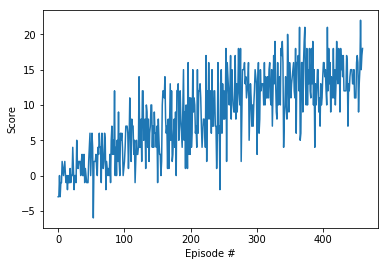

In [ ]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Run trained agent

In [ ]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, filename='checkpoint_dqn.pth')
scores = dqn(agent, numEpisods=100, flagT=False)

Episode 1	Average Score: 19.00
Episode 2	Average Score: 17.00===========================
Episode 3	Average Score: 17.33===========================
Episode 4	Average Score: 16.75===========================
Episode 5	Average Score: 17.80===========================
Episode 6	Average Score: 17.50===========================
Episode 7	Average Score: 17.86===========================
Episode 8	Average Score: 18.50===========================
Episode 9	Average Score: 18.44===========================
Episode 10	Average Score: 16.70===========================
Episode 11	Average Score: 16.45===========================
Episode 12	Average Score: 15.33===========================
Episode 13	Average Score: 15.46===========================
Episode 14	Average Score: 14.64===========================
Episode 15	Average Score: 13.80===========================
Episode 16	Average Score: 14.25===========================
Episode 17	Average Score: 14.47===========================
Episode 18	Average Score: 13.78==

## Close the environment

In [ ]:
env.close()

# Project report

## Learning algorithm

The learning algorithm used is vanilla Deep Q Learning as described in original paper. As an input the vector of state is used instead of an image so convolutional neural nework is replaced with deep neural network. The deep neural network has following layers:

- Fully connected layer - input: 37 (state size) output: 128
- Fully connected layer - input: 128 output 64
- Fully connected layer - input: 64 output: (action size)

Parameters used in DQN algorithm:

- Maximum steps per episode: 1000
- Starting epsilion: 1.0
- Ending epsilion: 0.01
- Epsilion decay rate: 0.999

## Results

![results](images/plot.png)

```
Episode 100	Average Score: 0.16
Episode 200	Average Score: 0.56
Episode 300	Average Score: 1.67
Episode 400	Average Score: 2.33
Episode 500	Average Score: 3.13
Episode 600	Average Score: 4.27
Episode 700	Average Score: 5.53
Episode 800	Average Score: 6.19
Episode 900	Average Score: 6.95
Episode 1000	Average Score: 7.73
Episode 1100	Average Score: 7.24
Episode 1200	Average Score: 8.52
Episode 1300	Average Score: 8.92
Episode 1400	Average Score: 10.42
Episode 1500	Average Score: 10.52
Episode 1600	Average Score: 10.62
Episode 1700	Average Score: 11.35
Episode 1800	Average Score: 11.57
Episode 1900	Average Score: 11.44
Episode 2000	Average Score: 11.97
Episode 2100	Average Score: 12.41
Episode 2200	Average Score: 12.42
Episode 2300	Average Score: 12.40
Episode 2374	Average Score: 13.06
Environment solved in 2274 episodes!	Average Score: 13.06
```

### Untrained agent

![untrained](images/untrained.gif)

### Trained agent

![trained](images/trained.gif)

## Ideas for future work

1. Extensive hyperparameter optimization
2. Double Deep Q Networks
3. Prioritized Experience Replay
4. Dueling Deep Q Networks
5. RAINBOW Paper
6. Learning from pixels
